In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df = df.join(df['heartbeat_signals'].str.split(',').apply(pd.Series).astype('float'))

In [4]:
df.drop(columns='heartbeat_signals', inplace=True)

In [5]:
df = df.rename({i:f's_{i}' for i in range(205)}, axis=1)

In [6]:
df.describe()

,id,label,s_0,s_1,s_2,s_3,s_4,s_5,s_6,s_7,...,s_195,s_196,s_197,s_198,s_199,s_200,s_201,s_202,s_203,s_204
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,0.856960,0.877481,0.775979,0.517597,0.325231,0.302762,0.304540,0.292635,0.281425,...,0.008361,0.007753,0.007199,0.006945,0.006638,0.006209,0.005884,0.005493,0.005153,0.004944
std,28867.657797,1.217084,0.257405,0.233363,0.242027,0.258848,0.228784,0.216834,0.219299,0.212661,...,0.061939,0.059616,0.057399,0.055720,0.055043,0.053221,0.051867,0.049825,0.048203,0.047093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,0.000000,0.912920,0.694979,0.346325,0.096215,0.129880,0.134570,0.112183,0.101003,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,0.000000,0.984183,0.859450,0.548674,0.282587,0.237989,0.245801,0.226516,0.233740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,2.000000,1.000000,0.932886,0.685619,0.519297,0.431341,0.443234,0.450344,0.432316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99999.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.984113,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum().sum()

0

In [8]:
df['label'].value_counts()

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64

<AxesSubplot:title={'center':'Log Normal'}, xlabel='label'>

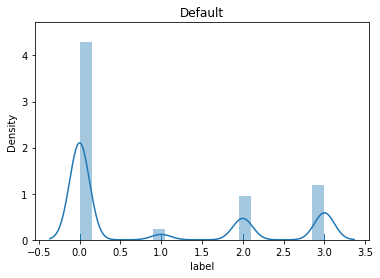

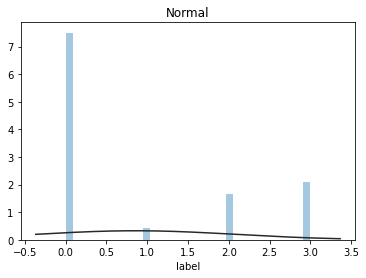

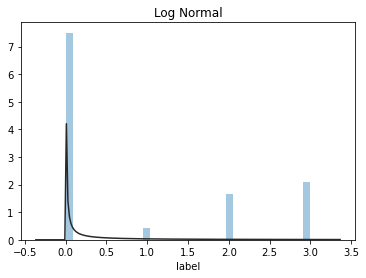

In [9]:
import scipy.stats as st
y = df['label']
plt.figure(1)
plt.title('Default')
sns.distplot(y, rug=True, bins=20)

plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 0.871005
Kurtosis: -1.009573


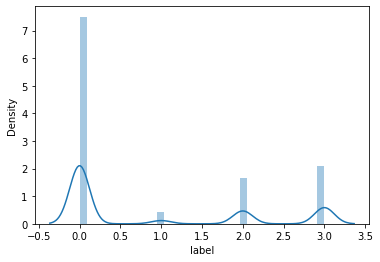

In [10]:
sns.distplot(df['label'])
print("Skewness: %f" % df['label'].skew())
print("Kurtosis: %f" % df['label'].kurt())

In [11]:
df.skew()

id        0.000000
label     0.871005
s_0      -2.663099
s_1      -1.828171
s_2      -0.257484
           ...    
s_200     9.596414
s_201     9.884861
s_202    10.103368
s_203    10.368363
s_204    10.534698
Length: 207, dtype: float64

In [12]:
df.kurt()

id        -1.200000
label     -1.009573
s_0        5.925605
s_1        2.990989
s_2       -0.692784
            ...    
s_200    103.381323
s_201    109.540039
s_202    114.113488
s_203    119.632074
s_204    123.429958
Length: 207, dtype: float64

<AxesSubplot:xlabel='Kurtness', ylabel='Density'>

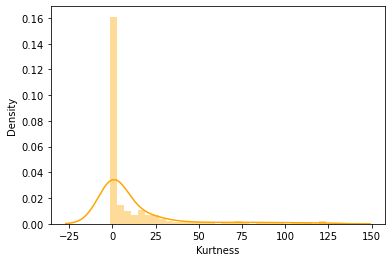

In [13]:
sns.distplot(df.kurt(), color='orange', axlabel ='Kurtness')

(array([64327.,     0.,     0.,  3562.,     0.,     0., 14199.,     0.,
            0., 17912.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

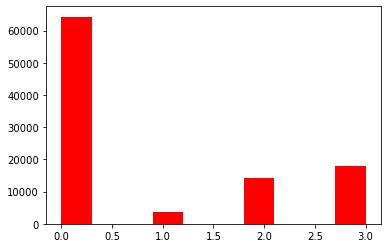

In [14]:
plt.hist(df['label'], orientation = 'vertical', histtype = 'bar', color ='red')

In [15]:
import numpy as np
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [16]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%


In [17]:
import pandas_profiling

In [20]:
pfr = pandas_profiling.ProfileReport(df.sample(10000))

In [ ]:
pfr